# MultiLinear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Link

https://www.kaggle.com/annetxu/health-insurance-cost-predicition/data

In [2]:
df = pd.read_csv('dataset/insurance.csv')  
df.sample(10)

,age,gender,bmi,children,smoker,region,charges
650,49,female,42.680,2,no,southeast,9800.88820
652,48,female,31.130,0,no,southeast,8280.62270
896,43,female,20.045,2,yes,northeast,19798.05455
1144,50,male,32.300,2,no,southwest,9630.39700
467,56,female,33.820,2,no,northwest,12643.37780
720,51,female,40.660,0,no,northeast,9875.68040
560,46,female,19.950,2,no,northwest,9193.83850
417,36,female,22.600,2,yes,southwest,18608.26200
1321,62,male,26.695,0,yes,northeast,28101.33305
907,44,female,32.340,1,no,southeast,7633.72060


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum() #Checking null Values

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum() #checking Duplicates


1

In [6]:
df.drop_duplicates(inplace = True) #Dropping Duplicates
df.sample(10)

,age,gender,bmi,children,smoker,region,charges
173,35,female,34.800,1,no,southwest,5246.04700
919,35,female,34.210,1,no,southeast,5245.22690
507,21,male,23.750,2,no,northwest,3077.09550
123,44,male,31.350,1,yes,northeast,39556.49450
1187,62,female,32.680,0,no,northwest,13844.79720
769,38,female,19.475,2,no,northwest,6933.24225
844,53,male,30.495,0,no,northeast,10072.05505
780,30,male,24.400,3,yes,southwest,18259.21600
438,52,female,46.750,5,no,southeast,12592.53450
947,37,male,34.200,1,yes,northeast,39047.28500


In [7]:
# apllying encoding to smoker
df['smoker'] = df['smoker'].apply(lambda x : 1 if x == 'yes' else 0 )
df.sample(10)
df.shape

(1337, 7)

In [8]:
df.describe()
# BMI or (Body Mass Index) is a ratio of weight and height. It can be defined as the weight in kilograms, divided by the square of the height in metres.
# This ratio is used to classify whether a person is underweight, overweight or obese.

,age,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,13279.121487
std,14.044333,6.100468,1.205571,0.403806,12110.359656
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,53.130000,5.000000,1.000000,63770.428010


------------- Ploting Graphs ---------------------

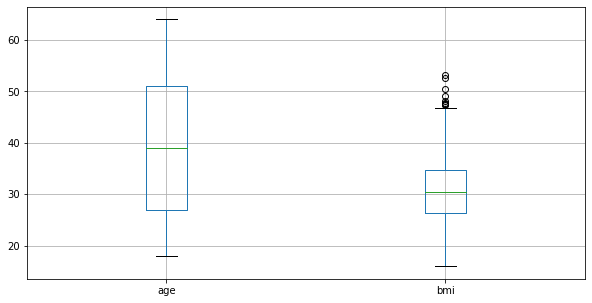

In [9]:
boxplot = df.boxplot(column=['age', 'bmi'], figsize=(10, 5))
boxplot

In [10]:
#  Getting Outlier Counts
outlier = df.bmi > np.quantile(df.bmi, .99)
outlier.value_counts()

False    1323
True       14
Name: bmi, dtype: int64

In [11]:
# q_low = df["bmi"].quantile(0.001)
q_hi  = df["bmi"].quantile(0.99)
print(q_hi)
df1 = df[(df["bmi"] < q_hi)]
df1.head()
print(df1.shape)

46.411200000000036
(1323, 7)


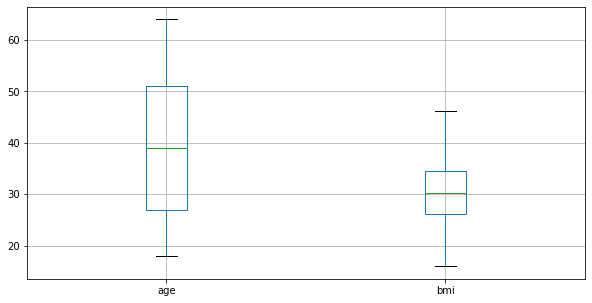

In [12]:
boxplot = df1.boxplot(column=['age', 'bmi'], figsize=(10, 5))
boxplot

In [13]:
df1.isnull().sum()  #Getting Null Values

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

[]

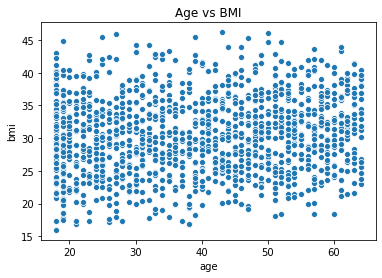

In [14]:
ax = sns.scatterplot(x = 'age', y = 'bmi', data = df1)
ax.set_title('Age vs BMI')
ax.plot()

[]

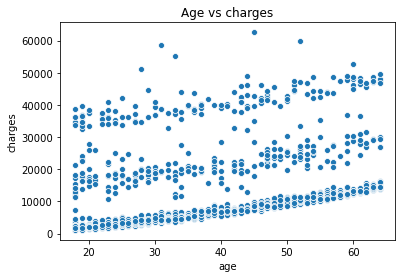

In [15]:
ax = sns.scatterplot(x = 'age', y = 'charges', data = df1)
ax.set_title('Age vs charges')
ax.plot()

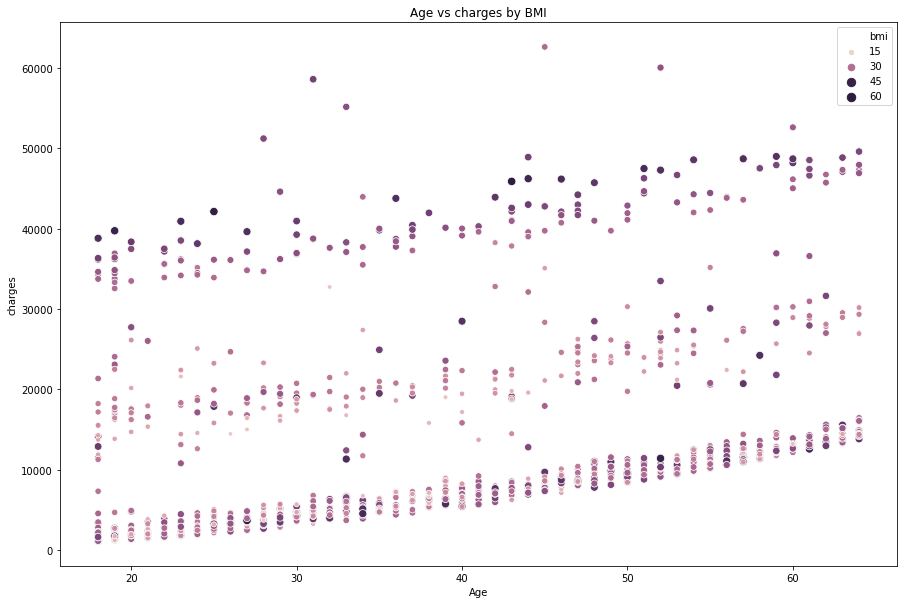

In [16]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges',hue = 'bmi',size = 'bmi', data=df1)
ax = ax.set_title("Age vs charges by BMI")
plt.xlabel("Age")
plt.ylabel("charges")
plt.show(ax)

In [17]:
gen = df1.gender.value_counts()
gen

male      666
female    657
Name: gender, dtype: int64

In [18]:
df2 = pd.get_dummies(df1.gender,drop_first =True)
df2.head(10)

,male
0,0
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [19]:
reg = df1.region.value_counts()
reg

southeast    353
northwest    324
northeast    323
southwest    323
Name: region, dtype: int64

In [20]:
df3 = pd.get_dummies(df1.region,drop_first =True)
df3.head(10)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,0
9,1,0,0


In [21]:
df_final = pd.concat([df1, df2, df3],axis='columns') #concating dataframe
df_final.head()

,age,gender,bmi,children,smoker,region,charges,male,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,1,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,1,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,1,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,1,1,0,0


In [22]:
df_final = df_final.drop(['gender','region'],axis=1) # Dropping catagericsl columns after encoding 
df_final.sample(10)

,age,bmi,children,smoker,charges,male,northwest,southeast,southwest
663,18,33.660,0,0,1136.39940,1,0,1,0
852,46,35.530,0,1,42111.66470,0,0,0,0
506,22,31.350,1,0,2643.26850,1,1,0,0
81,45,38.285,0,0,7935.29115,0,0,0,0
161,18,36.850,0,1,36149.48350,0,0,1,0
1121,46,38.170,2,0,8347.16430,1,0,1,0
1079,63,33.660,3,0,15161.53440,1,0,1,0
33,63,28.310,0,0,13770.09790,1,1,0,0
1130,39,23.870,5,0,8582.30230,0,0,1,0
413,25,23.900,5,0,5080.09600,1,0,0,1


In [23]:
y = df_final['charges']  # Target variable
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
X = df_final.drop(['charges'],axis=1) # Independent Variable
X.head()

,age,bmi,children,smoker,male,northwest,southeast,southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0


# Training our model

In [25]:
# Spliting data into train Test
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression #applying linear regrassion model
model = LinearRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accuracy = model.score(X_test,y_test) #Getting accuracy of our model Test
acuracy_train = model.score(X_train,y_train) #Getting accuracy of our model Train

In [27]:
print("acuracy on training :  %0.3f" % acuracy_train)
print("Accuracy on testing :  %0.3f"% accuracy)

acuracy on training :  0.752
Accuracy on testing :  0.745


In [28]:
# print("MAE:", metrics.mean_absolute_error(y_test, ypred))
# print('MSE:', metrics.mean_squared_error(y_test, ypred))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

In [29]:
# =========== Creating Function for predicting external values in our trained model ==============
import numpy as np
def predict_charges(region,age,gender,bmi,children,smoker):    
    loc_index = np.where(X.columns==region)[0][0]
    print(loc_index)
    x = np.zeros(len(X.columns))
    print(x)
    x[0] = age
    x[1] = gender
    x[2] = bmi
    x[3] = children
    x[4] = smoker
    if loc_index >= 0:
        x[loc_index] = 1
    print([x])
    return model.predict([x])[0]

In [30]:
predict_charges('southeast',25,0,20,0,1)

6
[0. 0. 0. 0. 0. 0. 0. 0.]
[array([25.,  0., 20.,  0.,  1.,  0.,  1.,  0.])]


2992.5970778256615

In [31]:
print("Intercept value:", model.intercept_)
print("Coefficient values:", model.coef_)

Intercept value: -11411.798376988801
Coefficient values: [ 2.56434326e+02  3.26094546e+02  4.64497084e+02  2.37574221e+04
 -1.44193022e+01 -4.16384849e+02 -1.28198506e+03 -1.36455203e+03]
